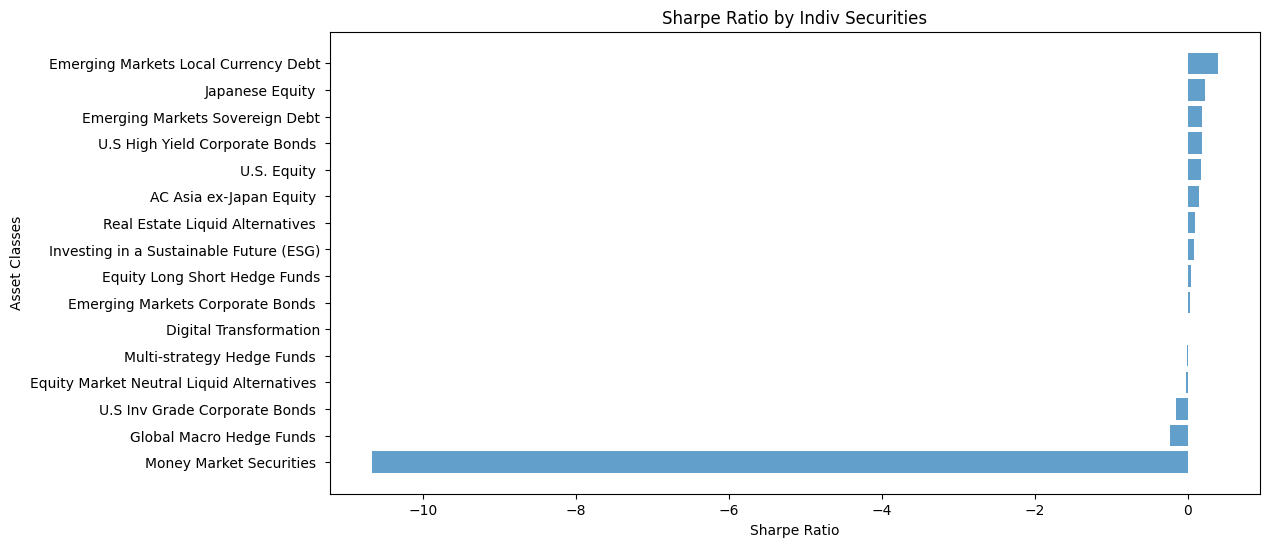

Fixed Income 0.032
Equities 0.0561
Fixed Income 0.057
Fixed Income 0.0846
Equities 0.042
Equities 0.008
Alternatives 0.0655
Thematics 0.0886
Alternatives 0.07
Fixed Income 0.0394
Thematics 0.0465
Alternatives 0.0294
Alternatives 0.0556
Fixed Income 0.0373
Alternatives 0.042
Fixed Income 0.0562
----


In [72]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("APPENDIX DATA.xlsx", sheet_name="ReturnData")

risk_free_rate =0.04
df['Sharpe Ratio'] = (df['Expected Return'] - risk_free_rate) / df['Expected Volatility']
df = df.sort_values(by='Sharpe Ratio', ascending=False)
plt.figure(figsize=(12, 6))
plt.barh(df['Security'], df['Sharpe Ratio'], alpha=0.7)
plt.xlabel('Sharpe Ratio')
plt.ylabel('Asset Classes')
plt.title('Sharpe Ratio by Indiv Securities')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest Sharpe Ratio at the top
plt.show()

for i, asset in enumerate(df["Asset Classes"]):
    print(asset, df["Expected Return"][i])
print("----")


{'whiskers': [<matplotlib.lines.Line2D at 0x125bc77d0>,
 'caps': [<matplotlib.lines.Line2D at 0x125bbbf90>,
 'boxes': [<matplotlib.lines.Line2D at 0x125b8da10>],
 'medians': [<matplotlib.lines.Line2D at 0x125bd1a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x125bd08d0>],
 'means': []}

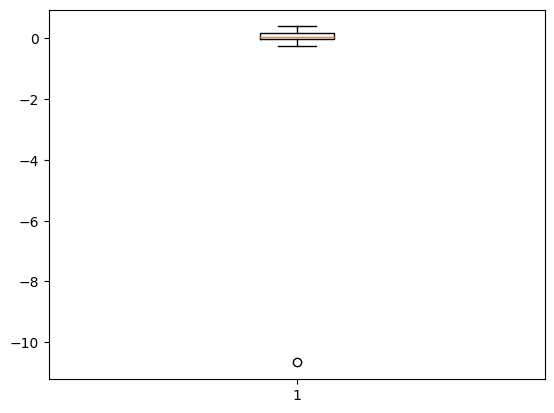

In [73]:
plt.boxplot(df["Sharpe Ratio"])

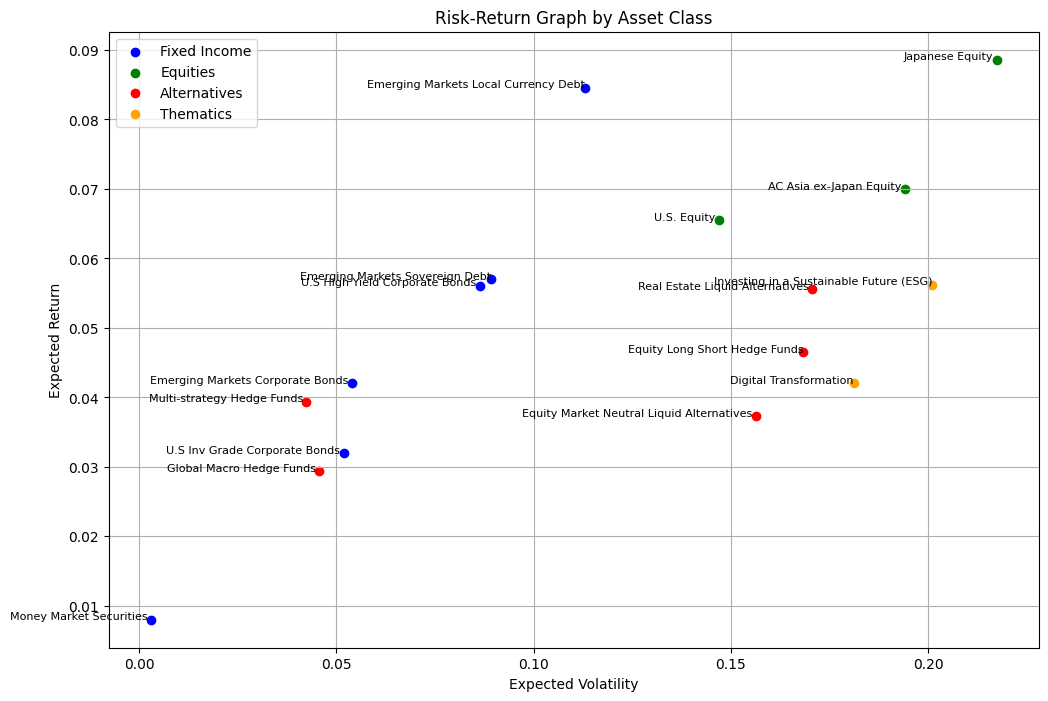

In [96]:
from sklearn.cluster import KMeans

# Create a color map for asset classes
colors = {
    "Fixed Income": "blue",
    "Equities": "green",
    "Alternatives": "red",
    "Thematics": "orange"
}

# Create a scatter plot for risk-return graph
plt.figure(figsize=(12, 8))
for asset_class, color in colors.items():
    asset_class_data = df[df["Asset Classes"] == asset_class]
    plt.scatter(
        asset_class_data["Expected Volatility"],
        asset_class_data["Expected Return"],
        label=asset_class,
        color=color,
        marker="o",
    )

# Add labels to data points (individual securities)
for i, asset in df.iterrows():
    plt.annotate(asset["Security"], (asset["Expected Volatility"], asset["Expected Return"]), fontsize=8, ha="right")

plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")
plt.title("Risk-Return Graph by Asset Class")
plt.legend()
plt.grid(True)
plt.show()

    Weight (Digital Transformation)  Weight (Sustainable Future)  \
45                             0.45                         0.55   

    Expected Return  Expected Volatility  
45          0.04839             0.134616  


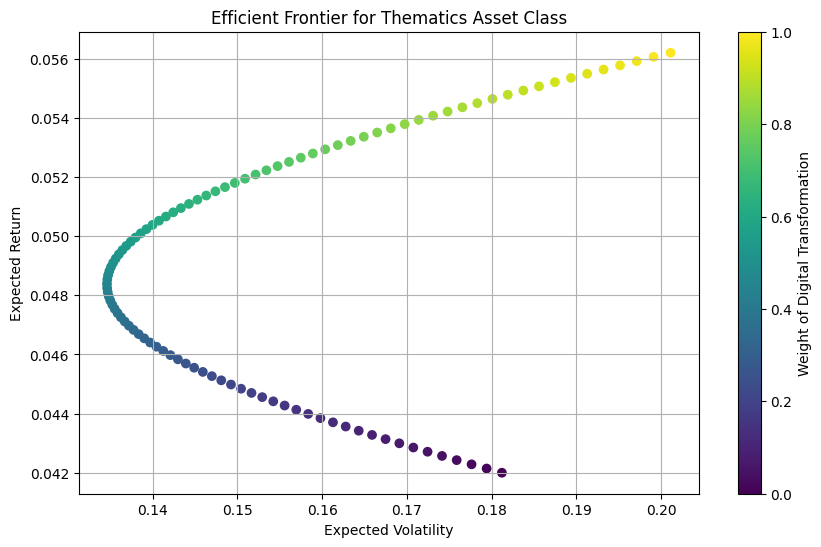

In [131]:
data = df[df["Asset Classes"] == "Thematics"]
data


# Define the range of weights for one asset
weights_digital_transformation = np.arange(0, 1.01, 0.01)

# Initialize lists to store portfolio metrics
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights_digital_transformation = []

# Calculate portfolio metrics for each weight combination
for weight_digital_transformation in weights_digital_transformation:
    weight_sustainable_future = 1 - weight_digital_transformation

    # Calculate portfolio expected return as a weighted average
    portfolio_return = (
        weight_digital_transformation * data["Expected Return"].values[0] +
        weight_sustainable_future * data["Expected Return"].values[1]
    )

    # Calculate portfolio expected volatility as a weighted average
    portfolio_volatility = np.sqrt(
        (weight_digital_transformation * data["Expected Volatility"].values[0]) ** 2 +
        (weight_sustainable_future * data["Expected Volatility"].values[1]) ** 2
    )

    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)
    portfolio_weights_digital_transformation.append(weight_digital_transformation)

# Create a DataFrame to store the results
portfolio_df = pd.DataFrame({
    "Weight (Digital Transformation)": portfolio_weights_digital_transformation,
    "Weight (Sustainable Future)": [1 - w for w in portfolio_weights_digital_transformation],
    "Expected Return": portfolio_returns,
    "Expected Volatility": portfolio_volatilities
})

# Identify portfolios on the efficient frontier (e.g., those with the minimum volatility)
efficient_frontier_df = portfolio_df[portfolio_df["Expected Volatility"] == min(portfolio_df["Expected Volatility"])]

# Display the table of portfolios on the efficient frontier
print(efficient_frontier_df)

# Plot the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatilities, portfolio_returns, c=portfolio_weights_digital_transformation, cmap='viridis', marker='o')
plt.colorbar(label='Weight of Digital Transformation')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier for Thematics Asset Class')
plt.grid(True)
plt.show()






In [147]:

data_fixed_income = df[df["Asset Classes"] == "Fixed Income"]
data_fixed_income



# Define an objective function to minimize - Sharpe ratio in this case
def calculate_portfolio_metrics(weights, expected_returns, expected_volatilities, risk_free_rate):
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights, np.dot(np.diag(expected_volatilities), weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio  # Minimize negative Sharpe ratio for optimization

# Define optimization constraints (sum of weights should be 1)
constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

# Define optimization bounds (weights should be between 0 and 1)
bounds = tuple((0, 1) for _ in range(len(data_fixed_income)))

# Define risk-free rate (you can set this to your chosen rate)
risk_free_rate = 0.03

# Initialize weights for optimization
initial_weights = np.array([1 / len(data_fixed_income)] * len(data_fixed_income))

# Perform optimization to maximize Sharpe ratio
result = minimize(calculate_portfolio_metrics, initial_weights, args=(
    np.array([security["Expected Return"] for i, security in data_fixed_income.iterrows()]),
    np.array([security["Expected Volatility"] for i,security in data_fixed_income.iterrows()]),
    risk_free_rate
), method='SLSQP', bounds=bounds, constraints=constraints)

# Get optimized portfolio weights
optimized_weights = result.x

# Print the optimized weights
for i, security in data_fixed_income.iterrows():
    print(f"{security['Security']}: {optimized_weights[i] * 100:.2f}%")

# Print the maximum Sharpe ratio achieved
print(f"Maximum Sharpe Ratio: {-result.fun:.4f}")

Emerging Markets Local Currency Debt: 16.50%
Emerging Markets Sovereign Debt: 22.42%
U.S High Yield Corporate Bonds : 22.45%
Emerging Markets Corporate Bonds : 2.77%
U.S Inv Grade Corporate Bonds : 35.86%
Money Market Securities : 0.00%
Maximum Sharpe Ratio: 0.2125


6


<Axes: xlabel='Volatility', ylabel='Returns'>

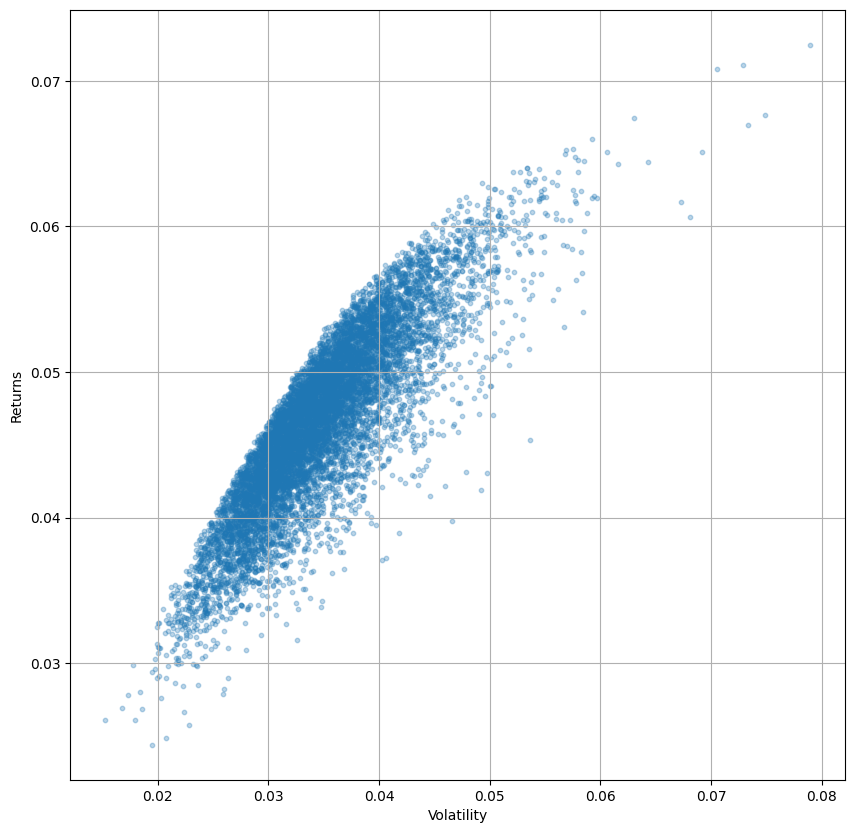

In [200]:

# Extract expected returns and volatilities into arrays
expected_returns_fixed_income = np.array([security["Expected Return"] for i,security in data_fixed_income.iterrows()])
expected_volatilities_fixed_income = np.array([security["Expected Volatility"] for i, security in data_fixed_income.iterrows()])
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights
num_securities = len(expected_returns_fixed_income)
print(num_securities)
num_portfolios = 10000
for portfolio in range(num_portfolios):
    weights = np.random.random(num_securities)
    # print(weights)?
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, expected_returns_fixed_income) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    volatility = np.sqrt(np.dot(weights ** 2, expected_volatilities_fixed_income ** 2 ))
    p_vol.append(volatility)
data = {'Returns':p_ret, 'Volatility':p_vol}


for i, security in data_fixed_income.iterrows():
    asset_name = security["Security"]
    weights_column_name = f"{asset_name} Weight"
    weights = [weights[i] for weights in p_weights]
    data[weights_column_name] = weights

portfolios = pd.DataFrame(data)
portfolios.head()

portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])



In [201]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns                                        0.026113
Volatility                                     0.015275
Emerging Markets Local Currency Debt Weight    0.141644
Emerging Markets Sovereign Debt Weight         0.071012
U.S High Yield Corporate Bonds  Weight         0.008349
Emerging Markets Corporate Bonds  Weight       0.117778
U.S Inv Grade Corporate Bonds  Weight          0.086755
Money Market Securities  Weight                0.574461
Name: 522, dtype: float64

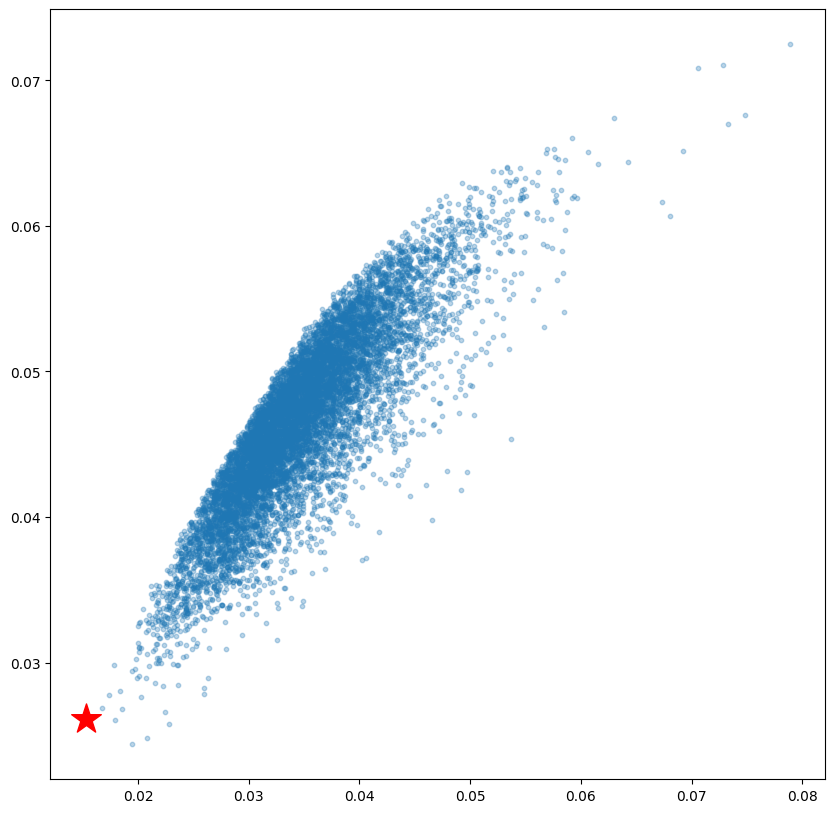

In [202]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [203]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port


Returns                                        0.049553
Volatility                                     0.032104
Emerging Markets Local Currency Debt Weight    0.283710
Emerging Markets Sovereign Debt Weight         0.159126
U.S High Yield Corporate Bonds  Weight         0.151708
Emerging Markets Corporate Bonds  Weight       0.194601
U.S Inv Grade Corporate Bonds  Weight          0.158605
Money Market Securities  Weight                0.052250
Name: 4659, dtype: float64

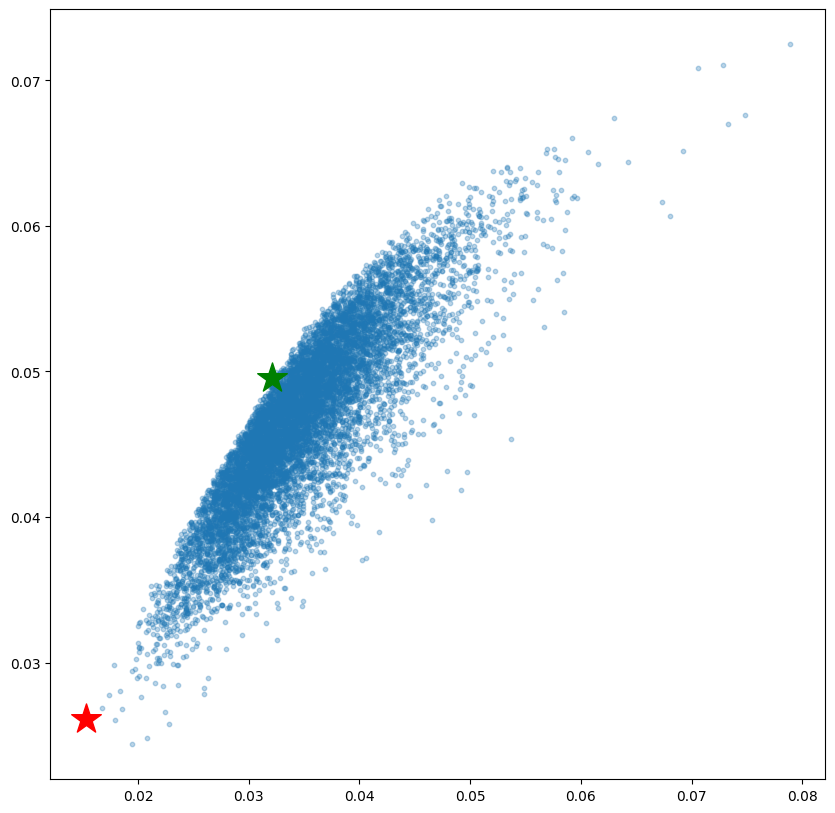

In [204]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [100]:
import numpy as np

num_assets = len(df)
equal_weights = np.ones(num_assets) / num_assets

equal_portfolio_return = np.sum(equal_weights * df["Expected Return"])

#Portfolio Volatility (σp) = √ [∑ (Wi * σi)²]


equal_portfolio_volatility = np.sqrt(np.dot(equal_weights, np.dot(np.diag(df["Expected Volatility"]), equal_weights)))



In [51]:
# Sharpe Ratio Weighted Portfolio
sharpe_weights = df["Sharpe Ratio"] / df["Sharpe Ratio"].sum()
sharpe_portfolio_return = np.sum(sharpe_weights * df["Expected Return"])
sharpe_portfolio_volatility = np.sqrt(np.dot(sharpe_weights, np.dot(np.diag(df["Expected Volatility"]), sharpe_weights)))



                                 Asset Classes  Expected Return  \
3         Emerging Markets Local Currency Debt           0.0846   
7                             Japanese Equity            0.0886   
2              Emerging Markets Sovereign Debt           0.0570   
1              U.S High Yield Corporate Bonds            0.0561   
6                                 U.S. Equity            0.0655   
8                     AC Asia ex-Japan Equity            0.0700   
12            Real Estate Liquid Alternatives            0.0556   
15     Investing in a Sustainable Future (ESG)           0.0562   
10               Equity Long Short Hedge Funds           0.0465   
4            Emerging Markets Corporate Bonds            0.0420   
14                      Digital Transformation           0.0420   
9                  Multi-strategy Hedge Funds            0.0394   
13  Equity Market Neutral Liquid Alternatives            0.0373   
0               U.S Inv Grade Corporate Bonds            0.032

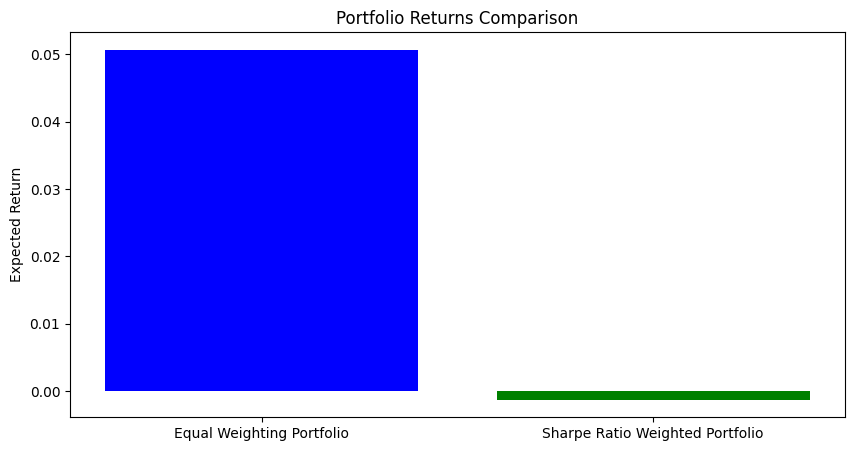

In [52]:
# Create a bar chart to compare portfolio returns
returns = [equal_portfolio_return, sharpe_portfolio_return]
labels = ['Equal Weighting Portfolio', 'Sharpe Ratio Weighted Portfolio']
plt.figure(figsize=(10, 5))
plt.bar(labels, returns, color=['blue', 'green'])
plt.ylabel('Expected Return')
plt.title('Portfolio Returns Comparison')
plt.show()

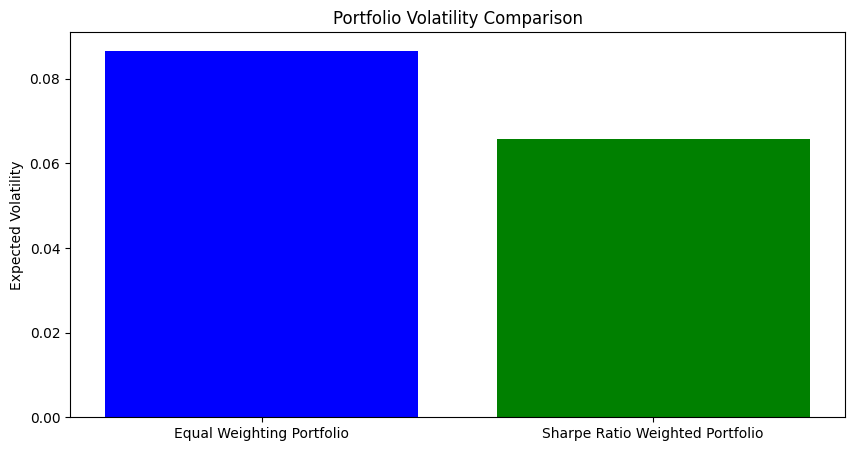

In [53]:
# Create a bar chart to compare portfolio volatilities
volatilities = [equal_portfolio_volatility, sharpe_portfolio_volatility]
labels = ['Equal Weighting Portfolio', 'Sharpe Ratio Weighted Portfolio']
plt.figure(figsize=(10, 5))
plt.bar(labels, volatilities, color=['blue', 'green'])
plt.ylabel('Expected Volatility')
plt.title('Portfolio Volatility Comparison')
plt.show()
